In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize

In [2]:
twitter=pd.read_csv('twitter.csv',header=None,encoding='latin-1',nrows=500000)

In [3]:
twitter.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
sen=twitter[5]

In [5]:
sen[1]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

In [6]:
sent=[sen[i].lower() for i in range(len(twitter))]

In [7]:
tag=twitter[0]

In [8]:
tag[2]

0

In [9]:
len(twitter)

500000

In [10]:
def p(v):
    return len(tag[tag==v])/(len(twitter))

In [11]:
p(0)

1.0

In [12]:
p(4)

0.0

# Sample

In [13]:
df=pd.DataFrame({'tag':[0,0,1,1],'letters':['a','b','c','d']},
                 index=['person1','person2','person3','person4'])

In [14]:
df

,tag,letters
person1,0,a
person2,0,b
person3,1,c
person4,1,d


In [15]:
df['tag']

person1    0
person2    0
person3    1
person4    1
Name: tag, dtype: int64

In [16]:
df.sample(n=3)

,tag,letters
person2,0,b
person3,1,c
person1,0,a


In [17]:
df.sample(frac=0.5)

,tag,letters
person3,1,c
person2,0,b


In [18]:
df.sample(frac=0.7)

,tag,letters
person3,1,c
person1,0,a
person2,0,b


In [19]:
df.sample(frac=1.5,replace=True)

,tag,letters
person1,0,a
person1,0,a
person3,1,c
person1,0,a
person4,1,d
person3,1,c


# Toy Example

In [20]:
twitter=pd.read_csv('twitter.csv',header=None,encoding='latin-1')

In [21]:
twitt5=twitter.sample(n=5)

In [22]:
twitt5

,0,1,2,3,4,5
74280,0,1694766680,Mon May 04 04:02:30 PDT 2009,NO_QUERY,mickyjc,i've got many big and SOLID bruises from paint...
14440,0,1553702930,Sat Apr 18 14:59:07 PDT 2009,NO_QUERY,whatswhat_sian,@EmeraldDiscount Well Monty seems ok now. Hype...
203368,0,1972346430,Sat May 30 09:03:11 PDT 2009,NO_QUERY,DreGarza,"Blessed be your day, my twiggaz. My knee is ki..."
25560,0,1558392002,Sun Apr 19 08:13:53 PDT 2009,NO_QUERY,Annielicious,Yummy. Chocolate Rasberry Truffle coffee this ...
59060,0,1686048872,Sun May 03 03:29:21 PDT 2009,NO_QUERY,phbayer,heid Faaade Session


In [23]:
tagtoy=twitt5[0]
senttoy=twitt5[5]

In [24]:
senttoy

74280     i've got many big and SOLID bruises from paint...
14440     @EmeraldDiscount Well Monty seems ok now. Hype...
203368    Blessed be your day, my twiggaz. My knee is ki...
25560     Yummy. Chocolate Rasberry Truffle coffee this ...
59060                                  heid Faaade Session 
Name: 5, dtype: object

In [25]:
whole_sent=np.concatenate([senttoy])

In [26]:
whole_sent

array(["i've got many big and SOLID bruises from paintball. must rub down ",
       '@EmeraldDiscount Well Monty seems ok now. Hyper in fact. Ii think it clicks back in ',
       "Blessed be your day, my twiggaz. My knee is killin me oh so bad!!  I wana cry.haha g2 G up! Double C's in the AIR tonight!!",
       "Yummy. Chocolate Rasberry Truffle coffee this morning. Enjoy the rest of your weekend friends. I think my son's game will be cancelled ",
       'heid Faaade Session '], dtype=object)

In [27]:
whole_sent[0]+whole_sent[1]

"i've got many big and SOLID bruises from paintball. must rub down @EmeraldDiscount Well Monty seems ok now. Hyper in fact. Ii think it clicks back in "

In [32]:
allsent=''
for i in range(len(twitt5)):
    allsent=whole_sent[i].lower()+allsent

In [33]:
allsent

"heid faaade session yummy. chocolate rasberry truffle coffee this morning. enjoy the rest of your weekend friends. i think my son's game will be cancelled blessed be your day, my twiggaz. my knee is killin me oh so bad!!  i wana cry.haha g2 g up! double c's in the air tonight!!@emeralddiscount well monty seems ok now. hyper in fact. ii think it clicks back in i've got many big and solid bruises from paintball. must rub down "

In [34]:
vocabulary=word_tokenize(allsent)

In [35]:
vocabulary

['heid',
 'faaade',
 'session',
 'yummy',
 '.',
 'chocolate',
 'rasberry',
 'truffle',
 'coffee',
 'this',
 'morning',
 '.',
 'enjoy',
 'the',
 'rest',
 'of',
 'your',
 'weekend',
 'friends',
 '.',
 'i',
 'think',
 'my',
 'son',
 "'s",
 'game',
 'will',
 'be',
 'cancelled',
 'blessed',
 'be',
 'your',
 'day',
 ',',
 'my',
 'twiggaz',
 '.',
 'my',
 'knee',
 'is',
 'killin',
 'me',
 'oh',
 'so',
 'bad',
 '!',
 '!',
 'i',
 'wana',
 'cry.haha',
 'g2',
 'g',
 'up',
 '!',
 'double',
 'c',
 "'s",
 'in',
 'the',
 'air',
 'tonight',
 '!',
 '!',
 '@',
 'emeralddiscount',
 'well',
 'monty',
 'seems',
 'ok',
 'now',
 '.',
 'hyper',
 'in',
 'fact',
 '.',
 'ii',
 'think',
 'it',
 'clicks',
 'back',
 'in',
 'i',
 "'ve",
 'got',
 'many',
 'big',
 'and',
 'solid',
 'bruises',
 'from',
 'paintball',
 '.',
 'must',
 'rub',
 'down']

In [36]:
len(vocabulary)

95

In [37]:
voc=set(vocabulary)

In [38]:
len(voc)

74

In [39]:
voc

{'!',
 "'s",
 "'ve",
 ',',
 '.',
 '@',
 'air',
 'and',
 'back',
 'bad',
 'be',
 'big',
 'blessed',
 'bruises',
 'c',
 'cancelled',
 'chocolate',
 'clicks',
 'coffee',
 'cry.haha',
 'day',
 'double',
 'down',
 'emeralddiscount',
 'enjoy',
 'faaade',
 'fact',
 'friends',
 'from',
 'g',
 'g2',
 'game',
 'got',
 'heid',
 'hyper',
 'i',
 'ii',
 'in',
 'is',
 'it',
 'killin',
 'knee',
 'many',
 'me',
 'monty',
 'morning',
 'must',
 'my',
 'now',
 'of',
 'oh',
 'ok',
 'paintball',
 'rasberry',
 'rest',
 'rub',
 'seems',
 'session',
 'so',
 'solid',
 'son',
 'the',
 'think',
 'this',
 'tonight',
 'truffle',
 'twiggaz',
 'up',
 'wana',
 'weekend',
 'well',
 'will',
 'your',
 'yummy'}

In [40]:
fr1=nltk.FreqDist(vocabulary)

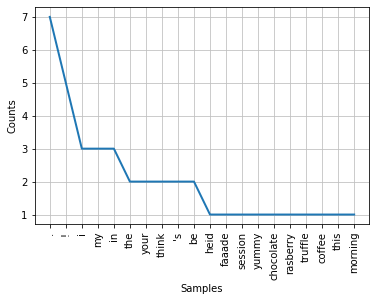

In [41]:
fr1.plot(20)

In [42]:
fr2=nltk.FreqDist(voc)

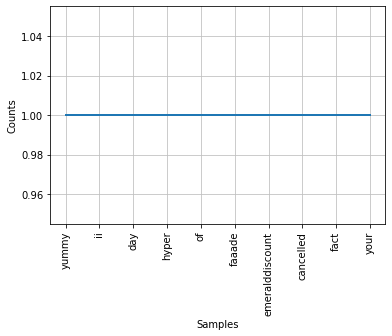

In [43]:
fr2.plot(10)

# Drop stop words and other stuff

In [44]:
allsent

"heid faaade session yummy. chocolate rasberry truffle coffee this morning. enjoy the rest of your weekend friends. i think my son's game will be cancelled blessed be your day, my twiggaz. my knee is killin me oh so bad!!  i wana cry.haha g2 g up! double c's in the air tonight!!@emeralddiscount well monty seems ok now. hyper in fact. ii think it clicks back in i've got many big and solid bruises from paintball. must rub down "

In [45]:
from nltk import RegexpTokenizer

In [46]:
reg1=RegexpTokenizer('\w*[0-9]\w*|\w*[$,@,#,~,£,%,&,*,!,+]\w*')
reg1_twitt=reg1.tokenize(allsent)

In [47]:
reg1_twitt

['day,', 'bad!', '!', 'g2', 'up!', 'tonight!', '!', '@emeralddiscount']

In [48]:
filter_all=allsent
for w in reg1_twitt:
    filter_all=filter_all.replace(w,"")

In [49]:
filter_all

"heid faaade session yummy. chocolate rasberry truffle coffee this morning. enjoy the rest of your weekend friends. i think my son's game will be cancelled blessed be your  my twiggaz. my knee is killin me oh so   i wana cry.haha  g up double c's in the air tonight well monty seems ok now. hyper in fact. ii think it clicks back in i've got many big and solid bruises from paintball. must rub down "

In [50]:
new_all=nltk.word_tokenize(filter_all)

In [51]:
new_voc=set(new_all)

In [52]:
len(new_voc)

67

In [53]:
from nltk.probability import FreqDist

In [54]:
fdis1=FreqDist(new_all)

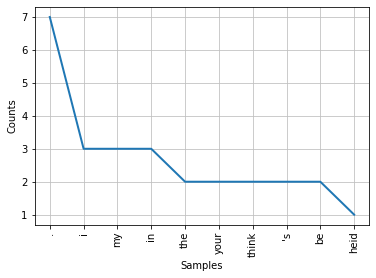

In [55]:
fdis1.plot(10)

In [56]:
from nltk.corpus import stopwords

In [57]:
stop_words=stopwords.words('english')

In [58]:
filtered_words=[]
for w in new_all:
    if w not in stop_words:
        filtered_words.append(w)

In [59]:
final_voc=set(filtered_words)

In [60]:
len(final_voc)

49

In [61]:
fqdis2=FreqDist(filtered_words)

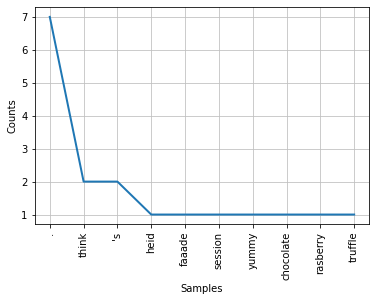

In [62]:
fqdis2.plot(10)

### Count the number of occurence that word 'w' appears in positive or negative sentences.

In [63]:
sent=list(senttoy)

In [64]:
sent[1]

'@EmeraldDiscount Well Monty seems ok now. Hyper in fact. Ii think it clicks back in '

In [65]:
tag=list(tagtoy)

In [66]:
money=[('money' in word_tokenize(sent[i])) and (tag[i]==0) for i in range(len(twitt5))]

In [67]:
money

[False, False, False, False, False]

In [68]:
def nk(word,given_tag):#total number of words whose tag is given_tag
    word_in_sen=[((word in word_tokenize(sent[i])) and (tag[i]==given_tag)) for i in range(len(twitt5))]
    nj=sum(word_in_sen)
    return nj

In [69]:
nk('money',0)

0

In [70]:
def n(given_tag):
    if given_tag==0 or given_tag==4:
        m1=[word_tokenize(twitter[tag==given_tag][5][i]) for i in range(len(twitt5))]
        m2=np.concatenate(m1)
        m3=set(m2)
        return m3
    else:
        raise Exception("tag should be 0 or 4")
    

    

In [71]:
def pr(w,given_tag):
    n_k=nk(w,given_tag)
    n_n=len(n(given_tag))
    prob=(n_k+1)/(n_n+len(voc))
    return prob
    
        

In [72]:
pr('times',0)

KeyError: False

In [73]:
pr('B',0)

KeyError: False

In [ ]:
tkn=word_tokenize(new)

In [ ]:
def sentiment(new):
    tkn=word_tokenize(new)
    p=1
    q=1
    for w in tkn:
        p=p*pr(w,0)
        q=q*pr(w,4)
    if p>q:
        return "Negative"
    else:
        return "Positive"
    
        
        
    

In [ ]:
sentiment('i like movie')